**1. Imports libs**

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install -q tensorflow-gpu==2.0.0-rc1
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print("TF", tf.__version__)
print("NP", np.__version__)


TF 2.0.0-rc1
NP 1.16.6


**2. Ready to MNIST Dataset**

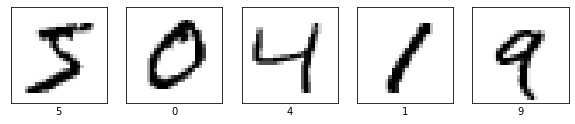

Shape of input_data: (60000, 28, 28)
Shape of labeled_data: (60000,)
Shape of input_test_data: (10000, 28, 28)
Shape of labeled_test_data: (10000,)


In [24]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

print("Shape of input_data: {}".format(x_train.shape))
print("Shape of labeled_data: {}".format(y_train.shape))

print("Shape of input_test_data: {}".format(x_test.shape))
print("Shape of labeled_test_data: {}".format(y_test.shape))

In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(
    10,
    input_shape=(28*28, ),
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='glorot_uniform',
    activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)

In [0]:
history = model.fit(
    x=x_train,
    y=y_train,
    # batch_size=3,
    epochs=10,
    validation_data=(x_test, y_test),
    verbose=0
)

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

10000/1 - 0s - loss: 0.1949 - sparse_categorical_accuracy: 0.9231


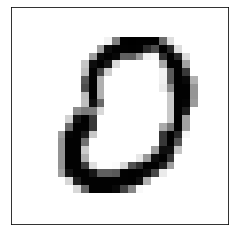

pred: 0, actual: 0


In [44]:
import random

predictions = model.predict(x_test)
r = random.randint(0, len(predictions)-1)

plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(x_test[r], cmap=plt.cm.binary)
plt.show()

print("pred: {}, actual: {}".format(np.argmax(predictions[r]), y_test[r]))